## Research Questions

1. How has the living wage ratio changed over time in Fresno County?
2. Which industries in Fresno County provide wages most supportive of upward mobility?
3. How do learning outcomes differ across income groups in Fresno?
4. How does housing affordability differ between renters and homeowners over time?


In [1]:
import os
import sys

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")

    # Clone repository if in Colab
    if not os.path.exists('/content/math120_final/'): # This one and the git clone name bellow has to match
        !git clone https://github.com/Branmejia1/math120_final.git

    # Change to project directory
    os.chdir('/content/math120_final')

except ImportError:
    IN_COLAB = False
    print("Running locally")

# Add src directory to Python path
if 'src' not in sys.path:
    sys.path.append('src')

print(f"Current working directory: {os.getcwd()}")

Running in Google Colab
Cloning into 'math120_final'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 42 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 3.88 MiB | 2.40 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Current working directory: /content/math120_final


# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# LOAD RAW DATA
income_raw = pd.read_csv('data_raw/64_mobility-metrics_place_income_longitudinal.csv', encoding='latin1')
education_raw = pd.read_csv('data_raw/20_mobility-metrics_county_mothers_education_longitudinal.csv', encoding='latin1')
industry_raw = pd.read_csv('data_raw/19_mobility-metrics_county_industry_longitudinal.csv', encoding='latin1')
tenure_raw = pd.read_csv('data_raw/67_mobility-metrics_place_tenure_longitudinal.csv', encoding='latin1')

print("Income shape:", income_raw.shape)
print("Education shape:", education_raw.shape)
print("Industry shape:", industry_raw.shape)
print("Tenure shape:", tenure_raw.shape)

income_raw.head()

Income shape: (27188, 19)
Education shape: (125710, 11)
Industry shape: (125720, 9)
Tenure shape: (13110, 19)


,year,state,place,state_name,place_name,subgroup,subgroup_type,index_air_hazard,index_air_hazard_quality,rate_learning,rate_learning_lb,rate_learning_ub,rate_learning_quality,share_digital_access,share_digital_access_quality,share_in_preschool,share_in_preschool_lb,share_in_preschool_ub,share_in_preschool_quality
0,2014,1,3076,Alabama,Auburn city,All,all,7.0,Strong,0.837132,0.658486,1.015777,Strong,NaN,NaN,0.437581,0.336410,0.538753,Marginal
1,2014,1,3076,Alabama,Auburn city,Economically Disadvantaged,income,NaN,NaN,0.970365,0.670959,1.269772,Strong,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,3076,Alabama,Auburn city,Not Economically Disadvantaged,income,NaN,NaN,0.742157,0.562167,0.922147,Strong,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,3076,Alabama,Auburn city,"Less than $50,000",income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.409007,0.266830,0.551184,Marginal
4,2014,1,3076,Alabama,Auburn city,"$50,000 or More",income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478215,0.338107,0.618323,Marginal


## Data Cleaning

Before analysis, the datasets were filtered to focus only on Fresno City or Fresno County, depending on the variable of interest. Rows with missing values in key outcome variables were excluded from visualizations to avoid misleading results. Only relevant columns were retained to simplify analysis and improve clarity.


In [15]:
industry_fresno_clean = industry_fresno[['year','subgroup','ratio_living_wage']]
industry_fresno_clean.head()

,year,subgroup,ratio_living_wage
1560,2014,All,0.587321
1561,2014,Goods Producing,0.511964
1562,2014,Public Administration,0.810286
1563,2014,"Trade, Transit, Utilities",0.577999
1564,2014,Information Services,1.201057


In [16]:
industry_subgroup = industry_fresno_clean.groupby('subgroup')['ratio_living_wage'].mean().sort_values(ascending=False)
industry_subgroup.head()

,ratio_living_wage
subgroup,
Information Services,1.097546
Public Administration,0.793083
Professional Services,0.701429
Education and Health,0.609956
All,0.588129


In [17]:
tenure_fresno = tenure_raw[
    (tenure_raw['place_name'] == 'Fresno city') &
    (tenure_raw['subgroup_type'] == 'tenure')
]

tenure_fresno.head()

,year,state,place,state_name,place_name,subgroup,subgroup_type,share_affordable_30_ami,share_affordable_50_ami,share_affordable_80_ami,share_affordable_30_ami_quality,share_affordable_50_ami_quality,share_affordable_80_ami_quality,share_affordable_available_30_ami,share_affordable_available_50_ami,share_affordable_available_80_ami,share_affordable_available_30_ami_quality,share_affordable_available_50_ami_quality,share_affordable_available_80_ami_quality
181,2014,6,27000,California,Fresno city,Renter,tenure,0.399132,0.523238,1.055734,Weak,Weak,Weak,0.302215,0.392277,0.868735,Weak,Weak,Weak
182,2014,6,27000,California,Fresno city,Owner,tenure,1.829245,1.560296,1.606074,Weak,Weak,Weak,0.511791,0.532154,0.749275,Weak,Weak,Weak
1636,2015,6,27000,California,Fresno city,Renter,tenure,0.322094,0.478306,1.120533,Weak,Weak,Weak,0.230962,0.363609,0.878543,Weak,Weak,Weak
1637,2015,6,27000,California,Fresno city,Owner,tenure,1.626059,1.426124,1.513608,Weak,Weak,Weak,0.506660,0.470753,0.707330,Weak,Weak,Weak
3091,2016,6,27000,California,Fresno city,Renter,tenure,0.334274,0.530273,1.075923,Weak,Weak,Weak,0.282168,0.423064,0.869580,Weak,Weak,Weak


In [18]:
income_fresno = income_raw[
    (income_raw['place_name'] == 'Fresno city') &
    (income_raw['subgroup_type'] == 'income') &
    (income_raw['rate_learning'].notna())
]
income_fresno.head()

,year,state,place,state_name,place_name,subgroup,subgroup_type,index_air_hazard,index_air_hazard_quality,rate_learning,rate_learning_lb,rate_learning_ub,rate_learning_quality,share_digital_access,share_digital_access_quality,share_in_preschool,share_in_preschool_lb,share_in_preschool_ub,share_in_preschool_quality
421,2014,6,27000,California,Fresno city,Economically Disadvantaged,income,NaN,NaN,1.056655,0.964409,1.148902,Strong,NaN,NaN,NaN,NaN,NaN,NaN
422,2014,6,27000,California,Fresno city,Not Economically Disadvantaged,income,NaN,NaN,0.802031,0.624016,0.980045,Strong,NaN,NaN,NaN,NaN,NaN,NaN
3816,2015,6,27000,California,Fresno city,Economically Disadvantaged,income,NaN,NaN,1.001426,0.917327,1.085525,Strong,NaN,NaN,NaN,NaN,NaN,NaN
3817,2015,6,27000,California,Fresno city,Not Economically Disadvantaged,income,NaN,NaN,0.682871,0.504944,0.860799,Strong,NaN,NaN,NaN,NaN,NaN,NaN
7211,2016,6,27000,California,Fresno city,Economically Disadvantaged,income,NaN,NaN,1.040718,0.951439,1.129997,Strong,NaN,NaN,NaN,NaN,NaN,NaN


# Downloading Clean Data



In [19]:
industry_fresno_clean.to_csv(
    "industry_fresno_clean.csv",
    index=False
)
from google.colab import files
files.download("industry_fresno_clean.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
industry_subgroup_df = industry_subgroup.reset_index()
industry_subgroup_df.columns = ["industry", "avg_living_wage_ratio"]

industry_subgroup_df.head()

industry_subgroup_df.to_csv(
    "industry_living_wage_by_industry.csv",
    index=False
)

from google.colab import files
files.download("industry_living_wage_by_industry.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
tenure_fresno_clean = tenure_fresno[
    [
        'year',
        'state_name',
        'place_name',
        'subgroup',
        'subgroup_type',
        'share_affordable_80_ami',
        'share_affordable_80_ami_quality'
    ]
].dropna(subset=['share_affordable_80_ami']) \
 .drop_duplicates() \
 .sort_values(['year', 'subgroup']) \
 .reset_index(drop=True)

tenure_fresno_clean.head()

tenure_fresno_clean.to_csv(
    "tenure_fresno_clean.csv",
    index=False
)

from google.colab import files
files.download("tenure_fresno_clean.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
income_fresno_clean = income_fresno[
    [
        'year',
        'state_name',
        'place_name',
        'subgroup',
        'subgroup_type',
        'rate_learning',
        'rate_learning_quality'
    ]
].drop_duplicates() \
 .sort_values(['year', 'subgroup']) \
 .reset_index(drop=True)

income_fresno_clean.head()

income_fresno_clean.to_csv(
    "income_fresno_clean.csv",
    index=False
)

from google.colab import files
files.download("income_fresno_clean.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

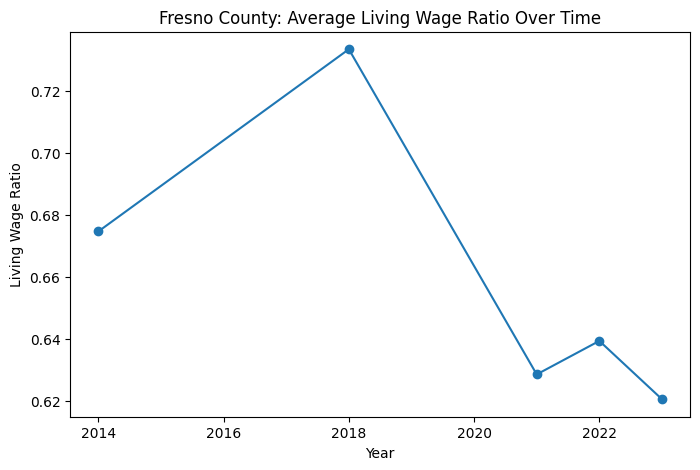

In [5]:
industry_fresno_clean = industry_fresno[['year','subgroup','ratio_living_wage']]
industry_fresno_clean.head()
industry_year_trend = industry_fresno_clean.groupby('year')['ratio_living_wage'].mean()

plt.figure(figsize=(8,5))
industry_year_trend.plot(kind='line', marker='o')
plt.title('Fresno County: Average Living Wage Ratio Over Time')
plt.ylabel('Living Wage Ratio')
plt.xlabel('Year')
plt.show()


### Variable Description: Living Wage Ratio
- A value of 1.0 indicates wages are sufficient to meet basic needs.  
- Values below 1.0 indicate that average wages fall short of covering essential expenses.


This graph shows that average living wage ratio has decreased over time in Fresno county. This makes upward mobility harder in households over the years. It shows that people are having trouble meeting their basic, likely due to rising living costs, inflation, and economic pressures throughout recent years.

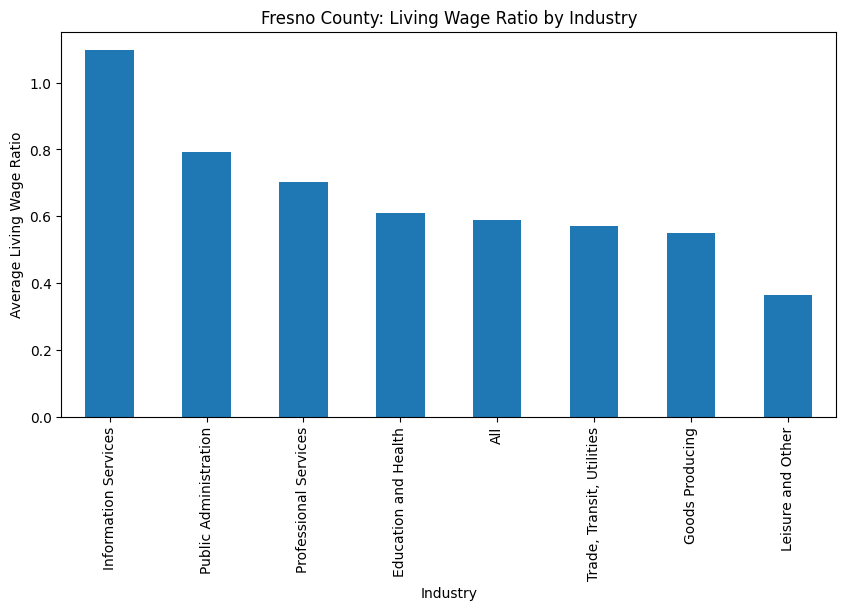

In [6]:
industry_subgroup = industry_fresno_clean.groupby('subgroup')['ratio_living_wage'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
industry_subgroup.plot(kind='bar')
plt.title('Fresno County: Living Wage Ratio by Industry')
plt.ylabel('Average Living Wage Ratio')
plt.xlabel('Industry')
plt.show()


### Variable Description: Living Wage Ratio by Industry

This visualization compares the average living wage ratio across different industry sectors in Fresno County.  
Each bar represents the average ratio for workers within a specific industry, indicating how well wages in that sector align with the cost of living.

This graphs shows the different wages for the different industries that people work for in the Fresno county. From the chart, Information Services has the highest living wage ratio, suggesting that workers in this industry are more likely to earn a wage that supports financial stability. On the other hands things such as Trade, Transit, Utilities; Goods Producing; and Leisure and Other have a lower living wage showing that people who work in these industries have a harder time have upward mobility

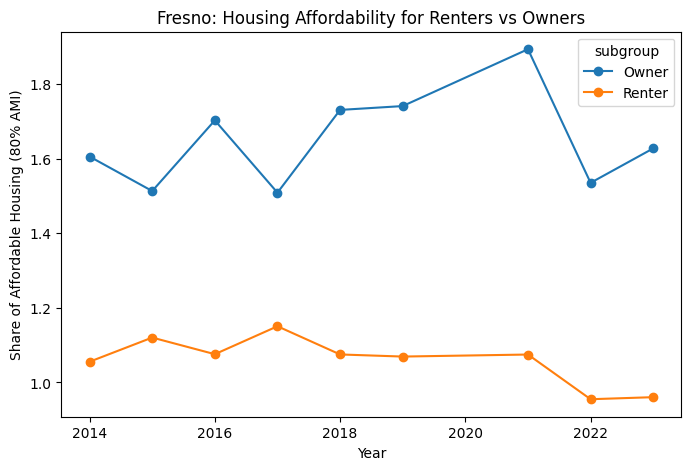

In [7]:
tenure_fresno = tenure_raw[
    (tenure_raw['place_name'] == 'Fresno city') &
    (tenure_raw['subgroup_type'] == 'tenure')
]

tenure_trend = tenure_fresno.groupby(['year','subgroup'])[
    'share_affordable_80_ami'
].mean().unstack()

tenure_trend.plot(figsize=(8,5), marker='o')
plt.title('Fresno: Housing Affordability for Renters vs Owners')
plt.ylabel('Share of Affordable Housing (80% AMI)')
plt.xlabel('Year')
plt.show()

### Variable Description: Housing Affordability by Tenure

- A value of 1.0 indicates that the supply of affordable housing meets demand.
- Values below 1.0 indicate a shortage of affordable housing.
- Values above 1.0 suggest a relative surplus of affordable units.

This graphs looks at both renters and homeowners in fresno and the housing affirdability between both of them. By looking at the graph we can see the the renters have a lower affodability compered to homewoners. This suggests that renters have a greater housing costs. This gap highlights that renters may limit upward mobility.

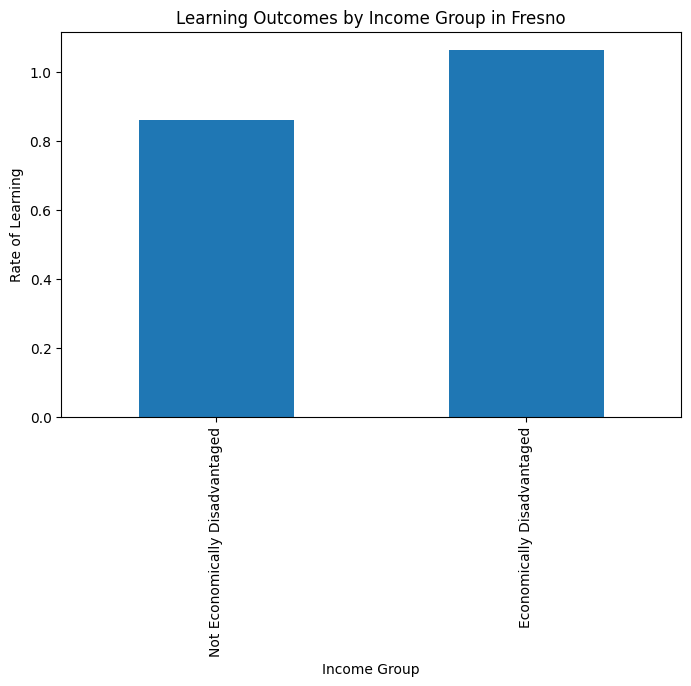

In [9]:
income_fresno = income_raw[
    (income_raw['place_name'] == 'Fresno city') &
    (income_raw['subgroup_type'] == 'income') &
    (income_raw['rate_learning'].notna())
]
income_compare = (
    income_fresno
    .groupby('subgroup')['rate_learning']
    .mean()
    .sort_values()
)

plt.figure(figsize=(8,5))
income_compare.plot(kind='bar')
plt.title('Learning Outcomes by Income Group in Fresno')
plt.ylabel('Rate of Learning')
plt.xlabel('Income Group')
plt.show()

### Data Cleaning Note

Only income subgroups with valid learning outcome data were included in this analysis. Categories with missing learning rate values were removed to prevent misleading or empty visualizations.

For this dataset there was some missing data so to avoid some empty graphs I removed the categories before analysis. This graph shows that economically disadvantaged groups have a lower learning outcomes. This suggests that income disadvantage is closely tied to reduced educational and economic mobility.